# Time Series Analysis with LSTM  

Multi-Layer Perceptron으로 수행하였던 time series forcasting을 가장 대표적인 RNN인 LSTM을 이용해서 동일한 조건으로 수행해 보겠습니다.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [15]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [16]:
# csv 포맷의 데이터 경로를 지정합니다.
dataset_filepath = 'datasets/airline-passengers.csv'
# csv 파일을 읽어들여 DataFrame 객체를 생성합니다.
df = pd.read_csv(dataset_filepath)

In [17]:
train_data = [([df.iat[i+j,1] for j in range(5)], df.iat[i+5,1]) for i in range(115)]
test_data = [([df.iat[i+j,1] for j in range(5)], df.iat[i+5,1]) for i in range(115, 139)]
X_train = np.array([X for (X,y) in train_data])
X_test = np.array([X for (X,y) in test_data])
y_train = np.array([y for (X,y) in train_data])
y_test = np.array([y for (X,y) in test_data])
X_val = X_test
y_val = y_test

In [18]:
# RNN의 경우 Dense와 입출력 tensor shape가 다르다.
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [19]:
# to reproduce same training result
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

Vanilla RNN을 사용할 때와 여기까지는 동일합니다.

In [20]:
# define model
model = Sequential()
#model.add(rnn_layer)  
model.add(LSTM(50, activation='relu', input_shape=(5, 1)))  # RNN Layer 대신 LSTM layer를 사용
model.add(Dense(1))
model.summary()

model.compile(optimizer='adam', loss='mse')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


LSTM layer는 내부적으로 LSTMCell layer를 가지고 있는 RNN Network layer 입니다.

In [9]:
# fit model
model.fit(X_train, y_train, epochs=1000, verbose=1, validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 115 samples, validate on 24 samples
Epoch 1/1000
115/115 [==============================] - 3s 26ms/step - loss: 66333.7598 - val_loss: 173567.5000
Epoch 2/1000
115/115 [==============================] - 0s 451us/step - loss: 53781.8635 - val_loss: 137196.8438
Epoch 3/1000
115/115 [==============================] - 0s 486us/step - loss: 41656.4975 - val_loss: 103866.0938
Epoch 4/1000
115/115 [==============================] - 0s 477us/step - loss: 31453.1186 - val_loss: 75611.1875
Epoch 5/1000
115/115 [==============================] - 0s 434us/step - loss: 22689.1010 - val_loss: 54048.1367
Epoch 6/1000
115/115 [==============================] - 0s 425us/step - loss: 15382.7178 - val_loss: 33859.3398
Epoch 7/1000
115/115 [==============================] - 0s 425us/step - loss: 8982.0059 - val_loss: 17489.2520
Epoch 8/1000
115/115 [==============================] - 0s 434us/step - loss: 4746.0969 - val_loss: 10048.5684
Epoch 9/100

115/115 [==============================] - 0s 460us/step - loss: 446.1738 - val_loss: 1637.8920
Epoch 147/1000
115/115 [==============================] - 0s 399us/step - loss: 504.6310 - val_loss: 1405.8636
Epoch 148/1000
115/115 [==============================] - 0s 416us/step - loss: 472.8384 - val_loss: 1835.1957
Epoch 149/1000
115/115 [==============================] - 0s 451us/step - loss: 518.5153 - val_loss: 1476.2340
Epoch 150/1000
115/115 [==============================] - 0s 442us/step - loss: 467.5631 - val_loss: 1688.7819
Epoch 151/1000
115/115 [==============================] - 0s 451us/step - loss: 509.7746 - val_loss: 1472.8164
Epoch 152/1000
115/115 [==============================] - 0s 442us/step - loss: 443.7166 - val_loss: 1624.7832
Epoch 153/1000
115/115 [==============================] - 0s 416us/step - loss: 465.0327 - val_loss: 1490.8521
Epoch 154/1000
115/115 [==============================] - 0s 434us/step - loss: 475.4569 - val_loss: 1449.7086
Epoch 155/1000
1

Epoch 220/1000
115/115 [==============================] - 0s 468us/step - loss: 357.2462 - val_loss: 1266.5004
Epoch 221/1000
115/115 [==============================] - 0s 434us/step - loss: 353.1645 - val_loss: 1164.4008
Epoch 222/1000
115/115 [==============================] - 0s 399us/step - loss: 346.8386 - val_loss: 1396.4489
Epoch 223/1000
115/115 [==============================] - 0s 399us/step - loss: 348.0726 - val_loss: 1177.9922
Epoch 224/1000
115/115 [==============================] - 0s 460us/step - loss: 344.0011 - val_loss: 1198.3173
Epoch 225/1000
115/115 [==============================] - 0s 442us/step - loss: 333.9181 - val_loss: 1267.3572
Epoch 226/1000
115/115 [==============================] - 0s 390us/step - loss: 349.0219 - val_loss: 1444.7607
Epoch 227/1000
115/115 [==============================] - 0s 434us/step - loss: 339.6075 - val_loss: 1175.5033
Epoch 228/1000
115/115 [==============================] - 0s 425us/step - loss: 330.4966 - val_loss: 1243.5541
E

Epoch 294/1000
115/115 [==============================] - 0s 434us/step - loss: 336.8745 - val_loss: 1119.8129
Epoch 295/1000
115/115 [==============================] - 0s 416us/step - loss: 351.7758 - val_loss: 1158.4130
Epoch 296/1000
115/115 [==============================] - 0s 460us/step - loss: 291.4126 - val_loss: 1391.5654
Epoch 297/1000
115/115 [==============================] - 0s 434us/step - loss: 329.6268 - val_loss: 1164.1844
Epoch 298/1000
115/115 [==============================] - 0s 434us/step - loss: 327.3455 - val_loss: 1082.8444
Epoch 299/1000
115/115 [==============================] - 0s 477us/step - loss: 291.2937 - val_loss: 1155.5939
Epoch 300/1000
115/115 [==============================] - 0s 477us/step - loss: 308.8401 - val_loss: 1164.1064
Epoch 301/1000
115/115 [==============================] - 0s 486us/step - loss: 304.2599 - val_loss: 1046.5490
Epoch 302/1000
115/115 [==============================] - 0s 442us/step - loss: 303.1592 - val_loss: 1169.5831
E

115/115 [==============================] - 0s 416us/step - loss: 255.0368 - val_loss: 1310.2711
Epoch 369/1000
115/115 [==============================] - 0s 390us/step - loss: 269.9241 - val_loss: 825.0403
Epoch 370/1000
115/115 [==============================] - 0s 408us/step - loss: 237.7999 - val_loss: 827.4510
Epoch 371/1000
115/115 [==============================] - 0s 382us/step - loss: 234.8872 - val_loss: 1005.9534
Epoch 372/1000
115/115 [==============================] - 0s 416us/step - loss: 286.6101 - val_loss: 976.3776
Epoch 373/1000
115/115 [==============================] - 0s 442us/step - loss: 275.1135 - val_loss: 1212.6893
Epoch 374/1000
115/115 [==============================] - 0s 425us/step - loss: 234.6704 - val_loss: 828.1989
Epoch 375/1000
115/115 [==============================] - 0s 477us/step - loss: 257.4402 - val_loss: 1020.4204
Epoch 376/1000
115/115 [==============================] - 0s 434us/step - loss: 246.3735 - val_loss: 1042.5074
Epoch 377/1000
115/1

115/115 [==============================] - 0s 434us/step - loss: 352.9017 - val_loss: 1504.0485
Epoch 517/1000
115/115 [==============================] - 0s 407us/step - loss: 325.9584 - val_loss: 2314.7559
Epoch 518/1000
115/115 [==============================] - 0s 451us/step - loss: 437.3302 - val_loss: 1500.5804
Epoch 519/1000
115/115 [==============================] - 0s 451us/step - loss: 281.2866 - val_loss: 1674.4010
Epoch 520/1000
115/115 [==============================] - 0s 416us/step - loss: 311.6858 - val_loss: 1184.1094
Epoch 521/1000
115/115 [==============================] - 0s 416us/step - loss: 386.1790 - val_loss: 1523.1686
Epoch 522/1000
115/115 [==============================] - 0s 425us/step - loss: 424.0766 - val_loss: 1126.1703
Epoch 523/1000
115/115 [==============================] - 0s 425us/step - loss: 411.9697 - val_loss: 1344.5463
Epoch 524/1000
115/115 [==============================] - 0s 442us/step - loss: 473.7992 - val_loss: 1829.6812
Epoch 525/1000
1

Epoch 590/1000
115/115 [==============================] - 0s 434us/step - loss: 456.5341 - val_loss: 1614.9086
Epoch 591/1000
115/115 [==============================] - 0s 399us/step - loss: 367.7210 - val_loss: 1345.3328
Epoch 592/1000
115/115 [==============================] - 0s 408us/step - loss: 404.7311 - val_loss: 1308.4579
Epoch 593/1000
115/115 [==============================] - 0s 399us/step - loss: 387.7530 - val_loss: 1336.2238
Epoch 594/1000
115/115 [==============================] - 0s 416us/step - loss: 439.2714 - val_loss: 1343.1776
Epoch 595/1000
115/115 [==============================] - 0s 416us/step - loss: 706.8952 - val_loss: 1698.5541
Epoch 596/1000
115/115 [==============================] - 0s 408us/step - loss: 464.1037 - val_loss: 1959.6696
Epoch 597/1000
115/115 [==============================] - 0s 408us/step - loss: 513.7756 - val_loss: 1279.2759
Epoch 598/1000
115/115 [==============================] - 0s 451us/step - loss: 553.1310 - val_loss: 1423.8011
E

Epoch 664/1000
115/115 [==============================] - 0s 408us/step - loss: 401.7035 - val_loss: 1698.2540
Epoch 665/1000
115/115 [==============================] - 0s 451us/step - loss: 397.3582 - val_loss: 1575.6919
Epoch 666/1000
115/115 [==============================] - 0s 477us/step - loss: 366.7801 - val_loss: 1450.6680
Epoch 667/1000
115/115 [==============================] - 0s 399us/step - loss: 341.1009 - val_loss: 1642.9517
Epoch 668/1000
115/115 [==============================] - 0s 399us/step - loss: 352.3925 - val_loss: 1438.1729
Epoch 669/1000
115/115 [==============================] - 0s 425us/step - loss: 377.0184 - val_loss: 1350.4392
Epoch 670/1000
115/115 [==============================] - 0s 425us/step - loss: 402.6303 - val_loss: 1475.0387
Epoch 671/1000
115/115 [==============================] - 0s 416us/step - loss: 394.2892 - val_loss: 1456.4821
Epoch 672/1000
115/115 [==============================] - 0s 408us/step - loss: 390.9556 - val_loss: 1569.6354
E

Epoch 738/1000
115/115 [==============================] - 0s 442us/step - loss: 425.1071 - val_loss: 1676.6840
Epoch 739/1000
115/115 [==============================] - 0s 416us/step - loss: 414.8456 - val_loss: 1720.9362
Epoch 740/1000
115/115 [==============================] - 0s 425us/step - loss: 397.4136 - val_loss: 1645.8945
Epoch 741/1000
115/115 [==============================] - 0s 442us/step - loss: 414.3034 - val_loss: 1531.7440
Epoch 742/1000
115/115 [==============================] - 0s 399us/step - loss: 381.8458 - val_loss: 1694.3822
Epoch 743/1000
115/115 [==============================] - 0s 425us/step - loss: 391.2434 - val_loss: 1894.1332
Epoch 744/1000
115/115 [==============================] - 0s 477us/step - loss: 404.8894 - val_loss: 1682.2360
Epoch 745/1000
115/115 [==============================] - 0s 460us/step - loss: 390.7498 - val_loss: 1632.9359
Epoch 746/1000
115/115 [==============================] - 0s 442us/step - loss: 397.0676 - val_loss: 1604.0684
E

Epoch 812/1000
115/115 [==============================] - 0s 451us/step - loss: 369.3288 - val_loss: 1549.7220
Epoch 813/1000
115/115 [==============================] - 0s 399us/step - loss: 358.9068 - val_loss: 1593.1442
Epoch 814/1000
115/115 [==============================] - 0s 434us/step - loss: 361.3031 - val_loss: 1659.2252
Epoch 815/1000
115/115 [==============================] - 0s 425us/step - loss: 356.7338 - val_loss: 1588.7993
Epoch 816/1000
115/115 [==============================] - 0s 425us/step - loss: 355.1157 - val_loss: 1506.8605
Epoch 817/1000
115/115 [==============================] - 0s 434us/step - loss: 365.5825 - val_loss: 1568.5811
Epoch 818/1000
115/115 [==============================] - 0s 408us/step - loss: 342.4914 - val_loss: 1777.8335
Epoch 819/1000
115/115 [==============================] - 0s 442us/step - loss: 364.0398 - val_loss: 1690.9420
Epoch 820/1000
115/115 [==============================] - 0s 442us/step - loss: 342.9665 - val_loss: 1449.8052
E

Epoch 886/1000
115/115 [==============================] - 0s 434us/step - loss: 359.2081 - val_loss: 1405.5775
Epoch 887/1000
115/115 [==============================] - 0s 408us/step - loss: 357.6880 - val_loss: 1402.7445
Epoch 888/1000
115/115 [==============================] - 0s 468us/step - loss: 386.9610 - val_loss: 1619.7955
Epoch 889/1000
115/115 [==============================] - 0s 442us/step - loss: 439.1561 - val_loss: 1622.3027
Epoch 890/1000
115/115 [==============================] - 0s 408us/step - loss: 389.2699 - val_loss: 1377.9110
Epoch 891/1000
115/115 [==============================] - 0s 390us/step - loss: 355.9354 - val_loss: 1607.7496
Epoch 892/1000
115/115 [==============================] - 0s 408us/step - loss: 371.7964 - val_loss: 1710.8887
Epoch 893/1000
115/115 [==============================] - 0s 520us/step - loss: 359.9837 - val_loss: 1516.6854
Epoch 894/1000
115/115 [==============================] - 0s 477us/step - loss: 381.2227 - val_loss: 1544.4722
E

Epoch 960/1000
115/115 [==============================] - 0s 399us/step - loss: 318.8462 - val_loss: 1403.2344
Epoch 961/1000
115/115 [==============================] - 0s 408us/step - loss: 321.0166 - val_loss: 1495.1637
Epoch 962/1000
115/115 [==============================] - 0s 434us/step - loss: 318.9669 - val_loss: 1581.3395
Epoch 963/1000
115/115 [==============================] - 0s 434us/step - loss: 325.0827 - val_loss: 1469.6514
Epoch 964/1000
115/115 [==============================] - 0s 425us/step - loss: 312.7529 - val_loss: 1433.2998
Epoch 965/1000
115/115 [==============================] - 0s 434us/step - loss: 315.0900 - val_loss: 1360.6685
Epoch 966/1000
115/115 [==============================] - 0s 451us/step - loss: 345.8552 - val_loss: 1364.7896
Epoch 967/1000
115/115 [==============================] - 0s 468us/step - loss: 342.1341 - val_loss: 1395.2135
Epoch 968/1000
115/115 [==============================] - 0s 503us/step - loss: 328.9284 - val_loss: 1687.3368
E

In [10]:
# check how exactly fit train data

y_hats = []
cur_y_hat = 0
for i in range(115):
    x_input = X_train[i]
    x_input_reshape = x_input.reshape(1,5,1)
    cur_y_hat = model.predict(x_input_reshape, verbose=0)
    cur_y_hat = np.squeeze(cur_y_hat)
    print('TRAIN DATA %d : predicted=%f, ground_truth=%d' % (i, cur_y_hat, y_train[i]))
    y_hats.append(cur_y_hat)

TRAIN DATA 0 : predicted=122.598328, ground_truth=135
TRAIN DATA 1 : predicted=151.324387, ground_truth=148
TRAIN DATA 2 : predicted=157.454819, ground_truth=148
TRAIN DATA 3 : predicted=158.581665, ground_truth=136
TRAIN DATA 4 : predicted=133.253922, ground_truth=119
TRAIN DATA 5 : predicted=111.643173, ground_truth=104
TRAIN DATA 6 : predicted=127.384758, ground_truth=118
TRAIN DATA 7 : predicted=126.483467, ground_truth=115
TRAIN DATA 8 : predicted=120.861313, ground_truth=126
TRAIN DATA 9 : predicted=139.225845, ground_truth=141
TRAIN DATA 10 : predicted=135.654953, ground_truth=135
TRAIN DATA 11 : predicted=137.831833, ground_truth=125
TRAIN DATA 12 : predicted=123.584358, ground_truth=149
TRAIN DATA 13 : predicted=162.037491, ground_truth=170
TRAIN DATA 14 : predicted=171.966217, ground_truth=170
TRAIN DATA 15 : predicted=162.287766, ground_truth=158
TRAIN DATA 16 : predicted=144.429306, ground_truth=133
TRAIN DATA 17 : predicted=129.329773, ground_truth=114
TRAIN DATA 18 : pred

Text(0.5, 1.0, 'RMSE: 18.9834')

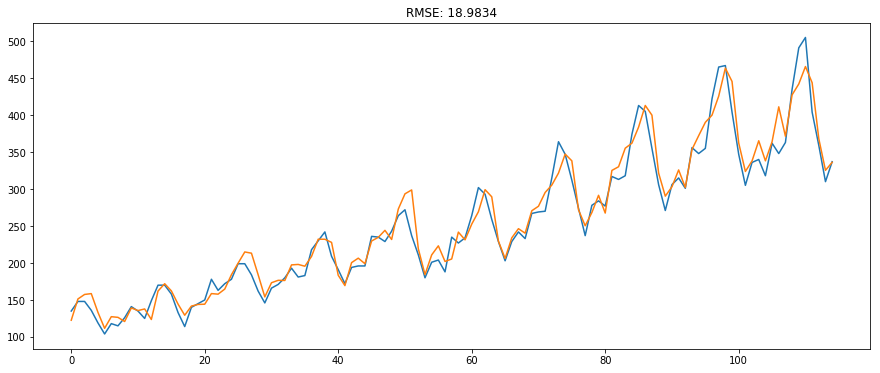

In [11]:
plt.plot(y_train)
plt.plot(y_hats)
plt.title('RMSE: %.4f'% np.sqrt(sum((y_hats-y_train)**2)/len(y_train)))

In [12]:
# predict with trained model

y_hats = []
cur_y_hat = 0
for i in range(24):
    if i == 0:  # test data 의 맨 첫번째 row에 대해서만 X 값을 그대로 활용
        x_input = X_test[0]
    else:       # 두번째 row부터는 이전 row의 prediction을 반영하여 X를 재구성
        x_input = x_input.tolist()
        del x_input[0]
        x_input.append(cur_y_hat)
        x_input = np.array(x_input)
    x_input_reshape = x_input.reshape(1,5,1)
    cur_y_hat = model.predict(x_input_reshape, verbose=0)
    cur_y_hat = np.squeeze(cur_y_hat)
    print('TEST DATA %d : predicted=%f, ground_truth=%d' % (i, cur_y_hat, y_test[i]))
    y_hats.append(cur_y_hat)

TEST DATA 0 : predicted=375.198608, ground_truth=360
TEST DATA 1 : predicted=380.938019, ground_truth=342
TEST DATA 2 : predicted=438.671783, ground_truth=406
TEST DATA 3 : predicted=416.153412, ground_truth=396
TEST DATA 4 : predicted=458.921112, ground_truth=420
TEST DATA 5 : predicted=494.929016, ground_truth=472
TEST DATA 6 : predicted=531.970215, ground_truth=548
TEST DATA 7 : predicted=562.958435, ground_truth=559
TEST DATA 8 : predicted=565.466919, ground_truth=463
TEST DATA 9 : predicted=620.049438, ground_truth=407
TEST DATA 10 : predicted=669.297058, ground_truth=362
TEST DATA 11 : predicted=714.997559, ground_truth=405
TEST DATA 12 : predicted=739.459412, ground_truth=417
TEST DATA 13 : predicted=768.104370, ground_truth=391
TEST DATA 14 : predicted=838.559204, ground_truth=419
TEST DATA 15 : predicted=902.639099, ground_truth=461
TEST DATA 16 : predicted=952.288940, ground_truth=472
TEST DATA 17 : predicted=983.162964, ground_truth=535
TEST DATA 18 : predicted=1043.883911, 

Text(0.5, 1.0, 'RMSE: 444.2842')

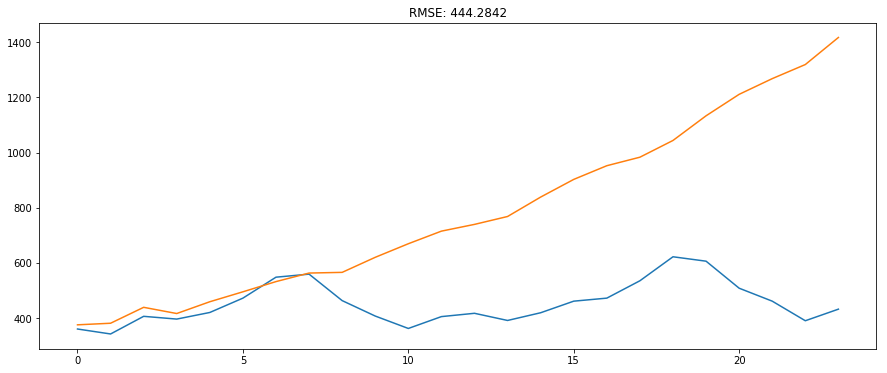

In [13]:
plt.plot(y_test)
plt.plot(y_hats)
plt.title('RMSE: %.4f'% np.sqrt(sum((y_hats-y_test)**2)/len(y_test)))